# REGRESSION TYPES & GRADIENT DESCENT IMPLEMENTATION

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy
import math
import random
from sklearn.datasets import make_regression

In [2]:
# Random Dataset

mu = 0.1 #mean
sigma = 0.1 #standard deviation

size_ = 200

x = np.arange(0,size_)
y = np.random.uniform(0,1,size_)

## Linear Regression

### Implementation of Cost Function

In [3]:
def compute_cost(X,y,w,b,lambda_ = 0):
    
    m = x.shape[0]
    
    # Weights mean slope in simple 2D linear regression model
  
    f_wb = np.dot(w,X) + b
    
    total_cost = 0
    
    # Deviation from the actual model is expressed in cost.
    
    # Lower cost means over-fit, higher means under-fit.
    
    for i in range(m):
        total_cost = total_cost + (1/(2*m)) * (f_wb[i]- y[i])**2
        
    return total_cost

### Gradient Function for Linear Regression

In [4]:
def gradient_function(X,y,w,b,lambda_ = 0):
    
    # The gradient function examines the effect of weights and biases on cost.
    # At the points where the gradient function approaches 0, the cost becomes minimum.
    
    m = x.shape[0]
    f_wb = np.dot(w,X) + b
    
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):
        dj_dw = dj_dw + (1/(m)) * (f_wb[i]- y[i]) * X[i]
        dj_db = dj_db + (1/(m)) * (f_wb[i]- y[i])
    
    return dj_dw, dj_db
    

### Gradient Descent

In [5]:
def gradient_descent(X,y,b_in, w_in, w_out, cost_function,gradient_function,learning_rate = 0.001,iteration = 10000,lambda_ = 0):
    
    # Gradient descent is the slope (gradient) of a cost function over time (iterations).
    # It finds the points where the limit converges to 0.

    
    m = x.shape[0]
    
    J_history = []
    w_history = []
    
    #Initially, random weights and bias are given.

    w = w_in
    b = b_in
    
    for i in range(iteration):
    
        # At each iteration, a new weight and gradient corresponding to the bias are calculated.

        # Since the learning rate will be small where the derivative goes to 0, the effect of the derivative 
        #                                 on the learning rate will converge to zero in the last iteration.

        dj_dw,dj_db = gradient_function(X,y,w,b,lambda_)
        w = w - learning_rate * dj_dw
        b = b - learning_rate * dj_db 
        
        if i<10000:      
            # It is enough to save the last steps for the program to work optimally.
            cost = cost_function(X,y,w,b,lambda_)
            J_history.append(cost)
            
        if i%math.ceil(iteration/10) == 0:
            w_history.append(w)
            print(f"Iteration {i:3}: Cost {J_history[-1]}   ")
    
    return w, b, J_history, w_history #w and J is for graphing
    

In [6]:
w_in = 0
w_out = 0
b = 0
descent = gradient_descent(x,y,b,w_in,w_out,compute_cost,gradient_function,0.0001,10000)

Iteration   0: Cost 0.08791999198801206   
Iteration 1000: Cost 0.07697358007072862   
Iteration 2000: Cost 0.07535509215319887   
Iteration 3000: Cost 0.07381611408716073   
Iteration 4000: Cost 0.0723527398709597   
Iteration 5000: Cost 0.07096125538921191   
Iteration 6000: Cost 0.06963812898619837   
Iteration 7000: Cost 0.06838000250234955   
Iteration 8000: Cost 0.0671836827510721   
Iteration 9000: Cost 0.06604613341428496   


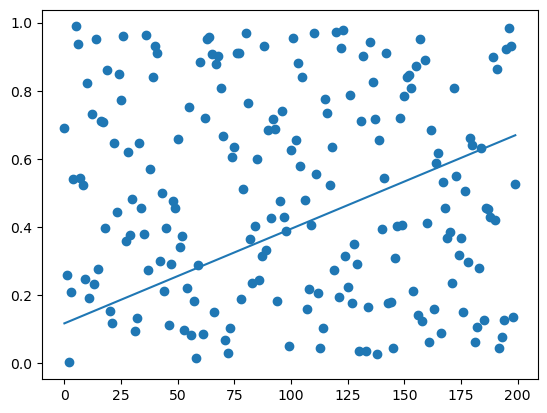

In [7]:
plt.scatter(x,y)
plt.plot(x,np.dot(descent[0],x)+descent[1])

## LOGISTIC REGRESSION

In [8]:
def sigmoid(z):
    # Sigmoid function gives values between 0 and 1. Mostly used in classification and probability.
    return 1/ (1 + np.exp(-z))

### Implementation of Cost Function

In [9]:
def logistic_cost(X,y,w,b, lambda_ = 1):
    
    m, n = X.shape
    
    j_cost_sum = 0
    
    for i in range(m):
        
        z_wb = 0
        j_cost = 0
        
        for j in range(n):
            z_wb_ij = w[j] * X[i,j]
            z_wb += z_wb_ij
            
        z_wb += b
        
        f_wb = sigmoid(z_wb)
        
        j_cost = -y[i] * np.log(f_wb) - (1-y[i]) * np.log(1 -f_wb)
        
        j_cost_sum += j_cost
    
    total_sum = (1/m) * j_cost_sum
        
    return total_sum
    

In [10]:
### Gradient of Cost Function

In [11]:
def logistic_gradient(X,y,w,b,lambda_ = 1):
    
    m,n = X.shape
    
    dj_dw = np.zeros(w.shape)
    dj_db = 0
    
    for i in range(m):
        z_wb = 0
        for j in range(n):
            z_wb += w[j] * x[i,j]
            
        z_wb += b
        f_wb = sigmoid(z_wb)
        
        dj_db_i = f_wb-y[i]
        dj_db += dj_db_i
        
        for j in range(n):
            dj_dw_ij = (f_wb - y[i])*X[i,j]
            dj_dw[j] += dj_dw_ij

                
    return (1/m) * dj_dw, (1/m) * dj_db
            
            

Random Dataset

In [12]:
size = 30
x = np.random.rand(size,2)
y = np.zeros(size)

for i in range(size):
    y[i] = 0
    if(i > size/2):
        y[i] = 1

In [13]:
np.random.seed(1)
w_in = 0.01 * (np.random.rand(2).reshape(-1,1) - 0.5)
b = -8

In [14]:
descent = gradient_descent(x,y,b,w_in,w_out,logistic_cost,logistic_gradient,0.001,10000)

Iteration   0: Cost [3.73290618]   
Iteration 1000: Cost [3.36817841]   
Iteration 2000: Cost [3.00434956]   
Iteration 3000: Cost [2.64252238]   
Iteration 4000: Cost [2.28515391]   
Iteration 5000: Cost [1.93756655]   
Iteration 6000: Cost [1.61042992]   
Iteration 7000: Cost [1.32162578]   
Iteration 8000: Cost [1.09179396]   
Iteration 9000: Cost [0.93088726]   


In [15]:
# Since the values will converge to 0 and 1 in logistic regression, a threshold limit of 0.5 is set.
 
# Anything above this value is evaluated as 1 and below this value as 0.

def predict(X,w,b):
    
    m,n = X.shape
    
    p = np.zeros(m)
    
    for i in range(m):
        
        z_wb = 0
        
        for j in range(n):      
            z_wb = w[j] * X[i,j]
            
        f_wb = sigmoid(z_wb)
        print(f_wb)
        if (f_wb > 0.5):
            p[i] = 1
        else:
            p[i] = 0
            
    return p
    

### Regularization

Regularization is used for adjusting the conditions like overfitting and underfitting. 

Here by using the lambda value, weights can be increased or decreased. 

Regularization cost is added to the loss function.

In [16]:
def regularized_cost(X,y,w,b,lambda_ = 1):
    
    m,n = X.shape
    
    cost_without_reg = logistic_cost(X,y,w,b,lambda_)
    
    reg_cost = 0
    
    for j in range(n):
        reg_cost += w[j]**2
    
        
    total_cost = cost_without_reg + (lambda_ * reg_cost) / (2*m)

In [17]:
def regularized_gradient(X,y,w,b,lambda_ = 1):
    
    m, n = X.shape
    
    dj_dw,dj_db = logistic_gradient(X, y, w, b, lambda_)
    
    for j in range(n):
        dj_dw[j] += (lambda_ / m) * w[j]
     
    return dj_dw, dj_db


In [18]:
w_in = 0.01 * (np.random.rand(2).reshape(-1,1) - 0.5)
b = -8

descent = gradient_descent(x,y,b,w_in,w_out,regularized_cost,regularized_gradient,0.001,10000, 1)

Iteration   0: Cost None   
Iteration 1000: Cost None   
Iteration 2000: Cost None   
Iteration 3000: Cost None   
Iteration 4000: Cost None   
Iteration 5000: Cost None   
Iteration 6000: Cost None   
Iteration 7000: Cost None   
Iteration 8000: Cost None   
Iteration 9000: Cost None   


In [19]:
descent[0]

array([[1.96489179],
       [2.10327962]])

In [20]:
descent = gradient_descent(x,y,b,w_in,w_out,logistic_cost,logistic_gradient,0.001,10000)

Iteration   0: Cost [3.73517272]   
Iteration 1000: Cost [3.37044135]   
Iteration 2000: Cost [3.00660429]   
Iteration 3000: Cost [2.64475837]   
Iteration 4000: Cost [2.28734744]   
Iteration 5000: Cost [1.93966668]   
Iteration 6000: Cost [1.61233914]   
Iteration 7000: Cost [1.3232001]   
Iteration 8000: Cost [1.09291204]   
Iteration 9000: Cost [0.93155073]   


In [21]:
descent[0]

array([[2.26852816],
       [2.43127296]])